In [1]:
# ws03
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

E:\work\machine_learing101\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


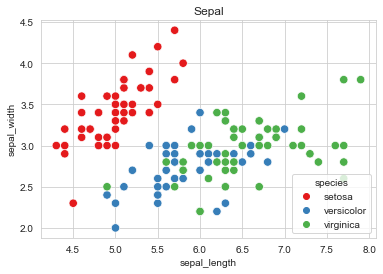

In [3]:
sns.set_style('whitegrid')
sns.scatterplot('sepal_length','sepal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Sepal')
plt.show()

E:\work\machine_learing101\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


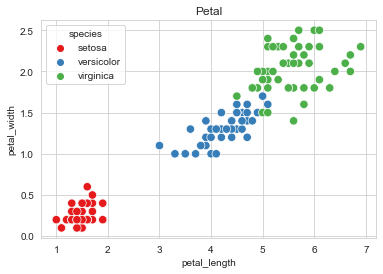

In [4]:
sns.scatterplot('petal_length','petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Petal')
plt.show()

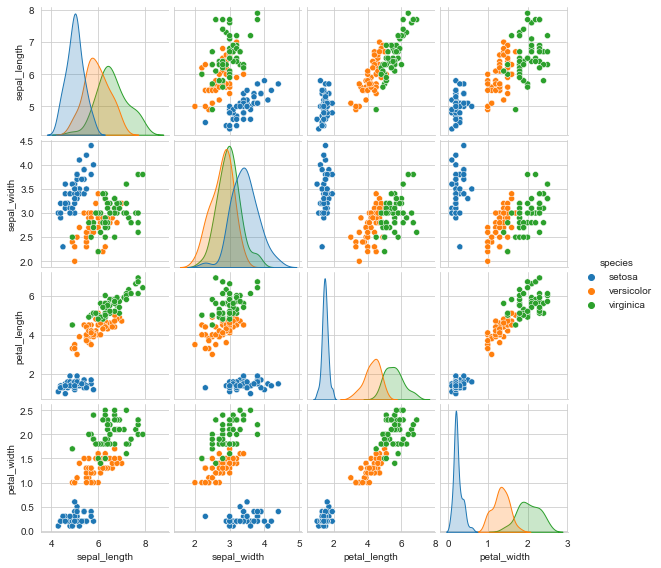

In [5]:
sns.pairplot(df, hue='species', height=2.0)
plt.show()

In [6]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [9]:
X.shape

(150, 4)

In [10]:
y.shape

(150,)

In [11]:
# ws06
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

cvs = cross_val_score(model, X, y, cv=10)  # no need to use model.fit
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [0.933 0.933 1.    0.933 0.933 0.933 0.867 1.    1.    1.   ]
mean (%) = 95.333


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3) 

In [13]:
# ws07
import numpy as np
(label, count) = np.unique(y_test , return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 15]
 ['versicolor' 17]
 ['virginica' 13]]


In [14]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.9778
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        17
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 16  1]
 [ 0  0 13]]


In [15]:
y_test[(y_test == y_pred)].count()

44

In [16]:
import pandas as pd
dy = pd.DataFrame()
dy['y_test'] = y_test
dy['y_pred'] = y_pred
dy['result'] = y_test == y_pred

dy[dy.result == False]

,y_test,y_pred,result
70,versicolor,virginica,False


In [17]:
# ws07
import numpy as np

X_input = np.array([[4.7,3.6,2.0,0.8],
                    [6.5,2.5,4.8,1.4]
                   ])
X_input

array([[4.7, 3.6, 2. , 0.8],
       [6.5, 2.5, 4.8, 1.4]])

In [18]:
# model.fit(X, y)
print(model.predict(X_input))

['versicolor' 'versicolor']


E:\work\machine_learing101\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [19]:
print(y.unique())
print(model.predict_proba(X_input).round(8))

['setosa' 'versicolor' 'virginica']
[[9.2456730e-02 9.0754313e-01 1.3000000e-07]
 [0.0000000e+00 9.7059811e-01 2.9401890e-02]]


E:\work\machine_learing101\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [20]:
# ws08
xsp = X_input[:,:1].reshape(1,-1)[0]
ysp = X_input[:,1:2].reshape(1,-1)[0]
xsp, ysp

(array([4.7, 6.5]), array([3.6, 2.5]))

E:\work\machine_learing101\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\work\machine_learing101\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


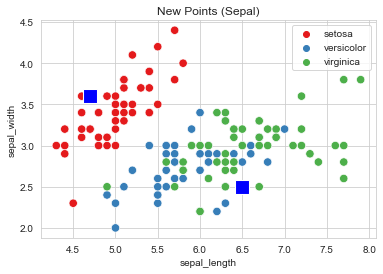

In [21]:
sns.scatterplot('sepal_length','sepal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('New Points (Sepal)')
sns.scatterplot(xsp, ysp, marker='s', color='blue', s=180)
plt.show()

In [22]:
xpe = X_input[:,2:3].reshape(1,-1)[0]
ype = X_input[:,3:4].reshape(1,-1)[0]
xpe, ype

(array([2. , 4.8]), array([0.8, 1.4]))

E:\work\machine_learing101\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\work\machine_learing101\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


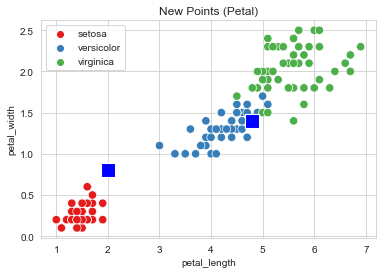

In [23]:
sns.scatterplot('petal_length','petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('New Points (Petal)')
sns.scatterplot(xpe, ype, marker='s', color='blue', s=180)
plt.show()

In [24]:
# ws09
from sklearn.svm import SVC

model = SVC(kernel='linear') 

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [1.    0.933 1.    1.    0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 97.333


In [25]:
model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


E:\work\machine_learing101\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [26]:
# ws10
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) 

cvs = cross_val_score(model, X, y, cv=10)  
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [1.    0.933 1.    0.933 0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 96.667


In [27]:
model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


E:\work\machine_learing101\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
# ws11
len(X_train)

105

In [29]:
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
class_names = df.species.unique()
class_names

In [ ]:
y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


print('Score: {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

skplot.metrics.plot_confusion_matrix(y_test, y_predict, normalize=False)


In [ ]:
# ws12
print(y.unique())

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(X)

In [ ]:
y_kmeans[:80]

In [ ]:
df['cluster'] = y_kmeans
df.sample(8)

In [ ]:
df[df.cluster==0].head()

In [ ]:

pvt = df.pivot_table(index='species',columns=['cluster'], values='petal_length',
                     fill_value=0, aggfunc='count')
pvt

In [ ]:
model.cluster_centers_

In [ ]:
x_centroids = model.cluster_centers_[:,0]
y_centroids = model.cluster_centers_[:,1]

In [ ]:
x_centroids

In [ ]:
sns.scatterplot('sepal_length','sepal_width',data=df,hue='species',s=50,palette='Set1')
plt.title('Actual')
plt.show()

In [ ]:
   
color_dict = dict({0:'blue',
                  1:'red',
                  2: 'g'})

centroid_colors=['r','b','m']
sns.scatterplot('sepal_length','sepal_width',data=df,hue='cluster', palette=color_dict, s=80)
plt.scatter(x_centroids, y_centroids,s=1200, marker='x', c=centroid_colors)
plt.title('k-Means Clustering')

plt.show()

In [ ]:
print(model.predict(X_input))

In [ ]:
w1 = df[(df.cluster==0) & (df.species!='versicolor')] #.count()
w2 = df[(df.cluster==2) & (df.species!='virginica')] #.count()

color_dict = dict({0:'blue',
                  1:'red',
                  2: 'g'})


sns.scatterplot('sepal_length','sepal_width',data=df,hue='cluster', palette=color_dict, s=80, alpha=0.7)

plt.scatter(w1.sepal_length, w1.sepal_width, marker='x',s=250,c='red')
plt.scatter(w2.sepal_length, w2.sepal_width, marker='x',s=250,c='black')
plt.title('k-Means Clustering')
plt.savefig('kmean-clustering-wrong',dpi=120)
plt.show()